Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

# Распознавание рукописных цифр MNIST

## Подготовка данных

*Разбор данного раздела:* https://youtu.be/Vd_1LDedB0Y?t=323

In [1]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense # Подключаем класс Dense - полносвязный слой
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train_org.shape

(60000, 28, 28)

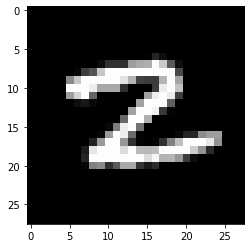

In [4]:
n = 143 #Номер картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB')) #Отрисовка картинки
plt.show() # Вывод картинки

In [5]:
y_train_org[n]

2

In [6]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [7]:
#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

In [8]:
y_train_org[0]

5

In [9]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [10]:
#Выводим размер y_train
#60 тысяч примеров, каждый размера 10 (так как 10 классов)
print(y_train.shape)

(60000, 10)


In [11]:
print(y_train[0]) #Выводим пример одного выходного вектора

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
print(y_train_org.shape)

(60000,)


In [13]:
print(y_train_org[36])

6


## Создание нейронной сети

*Разбор данного раздела:* https://youtu.be/Vd_1LDedB0Y?t=1022

In [14]:
model = Sequential() # Создаём сеть прямого распространения
model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
print(model.summary()) #Вывод структуры модели

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучение нейронной сети

*Разбор данного раздела:* https://youtu.be/Vd_1LDedB0Y?t=1456

In [ ]:
#fit - функция обучения нейронки
#x_train, y_train - обучающая выборка, входные и выходные данные
#batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
#epochs - количество эпох, когда нейронка обучается на всех примерах выборки
#verbose - 0 - не визуализировать ход обучения, 1 - визуализировать
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2014 - accuracy: 0.9395
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0745 - accuracy: 0.9776
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0499 - accuracy: 0.9840
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0338 - accuracy: 0.9891
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0251 - accuracy: 0.9919
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0201 - accuracy: 0.9932
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0123 - accuracy: 0.9960
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0147 - accuracy: 0.9952

In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

## Распознавание рукописных цифр

*Разбор данного раздела:* https://youtu.be/Vd_1LDedB0Y?t=1870

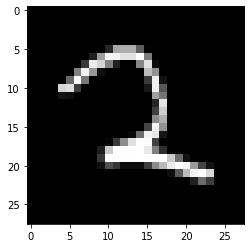

In [ ]:
n_rec = 387 #Номер тестовой цифры, которую будем распознавать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [ ]:
#Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [ ]:
#Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
#Потому что нейронка принимает именно массив примеров для распознавания
#Мы делаем массив из одного примера
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [ ]:
prediction = model.predict(x) #Распознаём наш пример

In [ ]:
print(prediction) #Выводим результат, это 10 цифр

[[3.6816719e-16 1.0550489e-07 9.9999988e-01 1.9557635e-10 1.6053264e-16
  4.2969881e-11 6.2810386e-12 1.7563030e-08 4.5943116e-10 8.6858957e-16]]


In [ ]:
sum(prediction[0])

1.0000000045628887

In [ ]:
pred = np.argmax(prediction) # Получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

2


In [ ]:
print(y_test_org[n_rec]) #выводим правильный ответ, для сравнения

2


# Глоссарий

**Функции активации**

https://keras.io/activations/ - документация

https://ru-keras.com/activation-function/ - русскоязычная документация

*   sigmoid - на выходе значения от 0 до 1
*   relu - на выходе значения от 0 до +∞
*   tanh - на выходе значения от -1 до +1
*   softmax - сумма значения выходов всех нейронов равна 1

**Функции ошибок**

https://keras.io/losses/ - документация

https://ru-keras.com/loss/ - русскоязычная документация


*   mse - среднеквадратичное отклонение
*   mae - среднее абсолютное значение
*   binary_crossentropy - бинарная кроссэнтропия
*   categorical_crossentropy - категориальная кроссэнтропия

**Оптимизаторы**

https://keras.io/optimizers/ - документация

https://ru-keras.com/optimizer/ - русскоязычная документация



*   Adam
*   RMSProp
*   Adadelta

**Градиентный спуск** - процесс поиска минимума функции ошибки

**MNIST** - набор изображений рукописных цифр 28х28 пикселей

**Способы обучения сети:**

*   .train_on_batch - один шаг обучения на фиксированном наборе данных
*   .fit - итерационное обучение сети с возможностью указания количества итераций (epochs) и размера пакета с обучающими данными (batch_size)

**Загрузка изображения**

image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’)



